# **Генерация индивидуальных вариантов**

Скопировать файл "Кредит.csv" в папку \content.

Выполнить следующие фрагменты кода.

In [ ]:
# установка библиотеки для генерации
%pip install sdv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.1/156.1 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 67.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.5/68.5 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.1/179.1 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 62.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.2/84.2 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 61.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8

In [ ]:
from sdv.datasets.local import load_csvs
data=load_csvs(folder_name = '/content')
from sdv.metadata import Metadata
metadata = Metadata.detect_from_dataframes(data)
from sdv.multi_table import HMASynthesizer
synthesizer = HMASynthesizer(metadata)
synthesizer.fit(data)

/usr/local/lib/python3.11/dist-packages/sdv/multi_table/base.py:101: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(
Preprocess Tables: 100%|██████████| 1/1 [00:00<00:00,  4.98it/s]



Learning relationships:



Modeling Tables: 100%|██████████| 1/1 [00:00<00:00,  1.27it/s]


Значение параметра `scale` установить равным номеру студента по списку в журнале, умноженному на 0,2.

Например, номер по списку 7, тогда `scale = 1.4`.

In [ ]:
synthetic_data = synthesizer.sample(scale = 2.0)

In [ ]:
import pandas as pd
import numpy as np
df = synthetic_data['Кредит']
df.head(10)

,ID клиента,Пол,Семейное положение,Иждивенцы,Образование,Самозанятость,Доход клиента,Доход поручителя,Сумма кредита,Срок кредита,Кредитная история,Место жительства,Одобрение кредита
0,sdv-id-YoJCTc,Male,No,0,Graduate,No,2764,7.525000e-10,107.0,360.0,1.0,Urban,Y
1,sdv-id-baJBwl,Male,No,0,Graduate,No,4884,1.185492e-02,128.0,360.0,0.0,Urban,Y
2,sdv-id-luQIva,Female,Yes,2,Graduate,Yes,4541,1.110000e-10,121.0,360.0,0.0,Urban,N
3,sdv-id-cjxjzN,Female,Yes,0,Graduate,No,3448,1.233867e+02,132.0,360.0,1.0,Semiurban,Y
4,sdv-id-Kkibjn,Male,Yes,0,Graduate,No,2424,1.129929e+01,123.0,360.0,0.0,Semiurban,Y
5,sdv-id-XLFfCf,Male,No,1,Graduate,No,1596,9.199599e+02,81.0,360.0,0.0,Urban,Y
6,sdv-id-uuYcoS,Male,Yes,0,Graduate,No,2725,3.018409e+03,122.0,360.0,1.0,Urban,N
7,sdv-id-BjvYke,Male,Yes,0,Graduate,No,1173,1.735155e+02,134.0,360.0,1.0,Semiurban,Y
8,sdv-id-YDBXkv,Male,No,0,Not Graduate,NaN,2918,3.427351e+02,118.0,360.0,1.0,Rural,Y
9,sdv-id-JhvUlZ,Male,Yes,0,Graduate,No,4984,4.319291e+02,105.0,84.0,0.0,Rural,N


In [ ]:
df.info()
df['Доход поручителя'].agg(['min', 'max'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762 entries, 0 to 761
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID клиента          762 non-null    object 
 1   Пол                 755 non-null    object 
 2   Семейное положение  762 non-null    object 
 3   Иждивенцы           750 non-null    object 
 4   Образование         762 non-null    object 
 5   Самозанятость       710 non-null    object 
 6   Доход клиента       762 non-null    int64  
 7   Доход поручителя    762 non-null    float64
 8   Сумма кредита       762 non-null    float64
 9   Срок кредита        746 non-null    float64
 10  Кредитная история   701 non-null    float64
 11  Место жительства    762 non-null    object 
 12  Одобрение кредита   762 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 77.5+ KB


,Доход поручителя
min,0.000000
max,6725.674202


#**Одномерный анализ данных**

Сформировать ряд распределения любого непрерывного количественного признака.

In [ ]:

ir = pd.interval_range(start = 0, freq = 1000, end = 7000, closed = 'right')
intervals = pd.cut(df['Доход поручителя'], bins = ir)
df2 = pd.DataFrame()
df2['Доход поручителя'] = intervals.value_counts(sort = False).index
df2['Относительная частота'] = np.round(intervals.value_counts(normalize = True, sort = False).values, 2)
df2

,Доход поручителя,Относительная частота
0,"(0, 1000]",0.89
1,"(1000, 2000]",0.07
2,"(2000, 3000]",0.02
3,"(3000, 4000]",0.01
4,"(4000, 5000]",0.01
5,"(5000, 6000]",0.00
6,"(6000, 7000]",0.00


Построить гистограмму выбранного непрерывного количественного признака.

Text(0, 0.5, 'Плотность вероятностей')

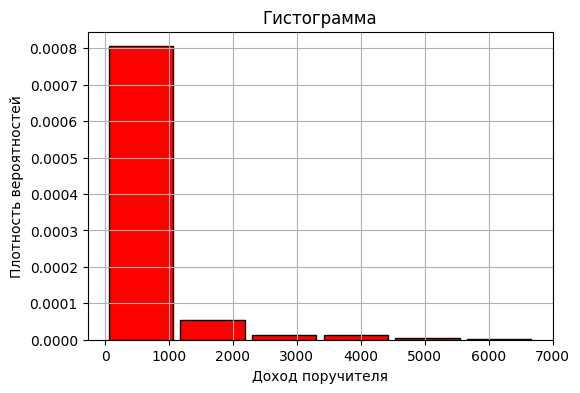

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (6, 4))
df['Доход поручителя'].hist(color = 'r', bins = 6, density = True, edgecolor = 'black', rwidth = 0.9)
plt.title('Гистограмма', size = 12)
plt.xlabel('Доход поручителя')
plt.ylabel('Плотность вероятностей')

Сформировать ряд распределения любого дискретного количественного признака.

In [171]:
df3 = pd.DataFrame()
df3['Срок'] = df['Срок кредита'].value_counts().index
df3['Абсолютная частота'] = df['Срок кредита'].value_counts().values
df3['Относительная частота'] = np.round(df['Срок кредита'].value_counts(normalize = True), 2).values
df3 = df3.sort_values(by='Срок')  # Сортировка по возрастанию
df3

,Срок,Абсолютная частота,Относительная частота
9,12.0,1,0.00
8,36.0,1,0.00
7,60.0,3,0.00
3,84.0,10,0.01
6,120.0,6,0.01
1,180.0,60,0.08
5,240.0,6,0.01
4,300.0,9,0.01
0,360.0,630,0.84
2,480.0,20,0.03


Построить полигон распределения выбранного дискретного количественного признака.

<Figure size 600x400 with 0 Axes>

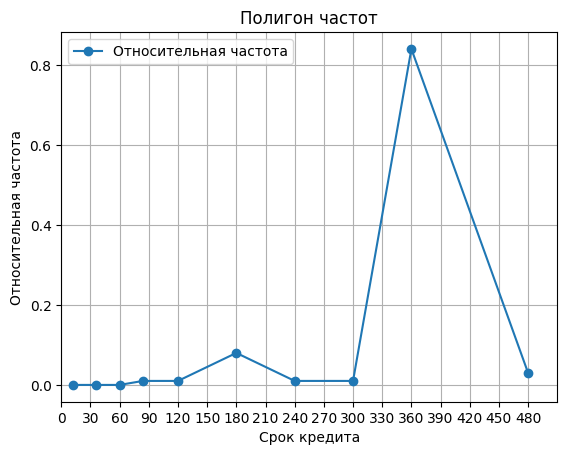

In [177]:
plt.figure(figsize = (6, 4))
df3.plot('Срок', 'Относительная частота', marker = 'o')
plt.title('Полигон частот')
plt.xticks(np.arange(0, 510, 30))
plt.xlim(0, 510)
plt.xlabel('Срок кредита')
plt.ylabel('Относительная частота')
plt.grid()
plt.show()

Вычислить оценки математического ожидания и стандартного отклонения для выбранного выше непрерывного количественного признака. Использовать выражения для расчета, представленные в лекции 1.

Использовать выражения для расчета, представленные в лекции 1.

In [178]:
df['Доход поручителя'].sum() / len(df['Доход поручителя'])

330.0711116279597

In [179]:
((df['Доход поручителя'] - df['Доход поручителя'].mean())**2/(len(df) - 1)).sum() ** 0.5

816.3833382623093

Использовать встроенные функции библиотеки `pandas`.

In [180]:
df['Доход поручителя'].mean()

330.0711116279597

In [181]:
df['Доход поручителя'].std()

816.3833382623093

Вычислить квантили уровня 0,15 и 0,95 для выбранного выше непрерывного количественного признака.

In [ ]:
df['Доход поручителя'].quantile(0.95)

1779.6283164375504

In [ ]:
df['Доход поручителя'].quantile(0.15)

4.610113702499999e-05

Провести визуальный анализ на предмет соответствия выбранного выше непрерывного количественного признака нормальному закону распределения.

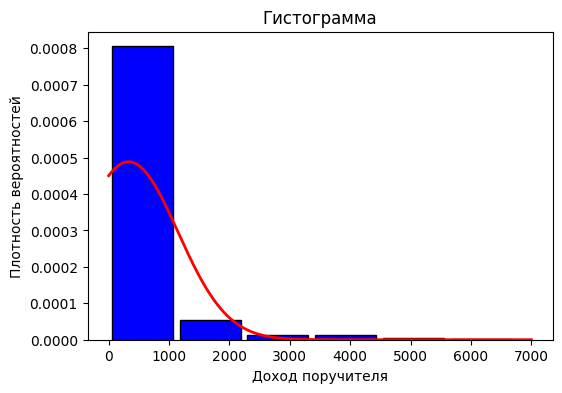

In [ ]:
import scipy.stats as sts
morm_rv = sts.norm(loc = 330.0, scale = 816.3)
x = np.linspace(0, 7000, 1000)
norm_pdf = morm_rv.pdf(x)

plt.figure(figsize = (6, 4))
df['Доход поручителя'].hist(color = 'b',
                            bins = 6,
                            density = True,
                            edgecolor = 'black',
                            rwidth = 0.9)
plt.plot(x, norm_pdf, color = 'r', lw = 2)
plt.title('Гистограмма', size = 12)
plt.xlabel('Доход поручителя')
plt.ylabel('Плотность вероятностей')
plt.grid()

Проверить статистическую гипотезу о распределении выбранного выше непрерывного количественного признака по нормальному закону.

In [ ]:
from scipy.stats import shapiro
shapiro(df['Доход поручителя'])

ShapiroResult(statistic=0.4626478175660568, pvalue=8.905355140435912e-43)

Проверить статистическую гипотезу о равенстве математического ожидания выбранного выше непрерывного количественного признака предполагаемому значению.

In [ ]:
sts.ttest_1samp(a = df['Доход поручителя'], popmean = 1)

TtestResult(statistic=11.126872495408348, pvalue=9.4549562747553e-27, df=761)

Выбрать любой категориальный признак, имющий более двух градаций и определить количество клиентов в каждой категории.

In [ ]:
df['Место жительства'].value_counts()

,count
Место жительства,
Semiurban,305
Urban,254
Rural,203


Построить диаграмму распределения клиентов по категориям выбранного выше категориального признака.

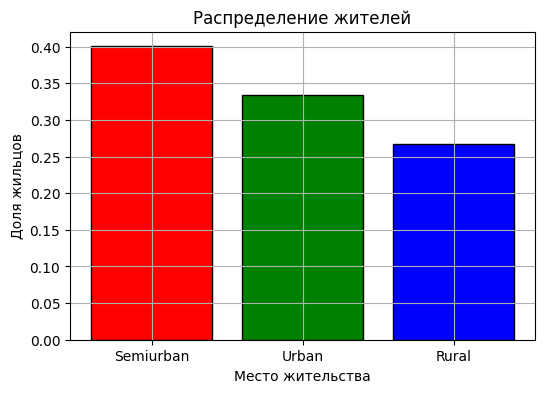

In [ ]:
places = pd.DataFrame()
places['Место жительства'] = df['Место жительства'].value_counts().index
places['Доля жителей'] = df['Место жительства'].value_counts(normalize = True).values
plt.figure(figsize = (6, 4))
plt.xlabel('Место жительства')
plt.ylabel('Доля жильцов')
plt.bar (x = places['Место жительства'],
         height = places['Доля жителей'],
         edgecolor = 'black',
         color = ['r', 'g', 'b'])
plt.title('Распределение жителей')
plt.grid()

Проверить статистическую гипотезу о равенстве математических ожиданий выбранного выше непрерывного количественного признака для различных категорий любого бинарного категориального признака.

In [195]:
df.groupby('Одобрение кредита')['Доход поручителя'].mean()
yes = df[df['Одобрение кредита'] == 'Y']['Доход поручителя']
no = df[df['Одобрение кредита'] == 'N']['Доход поручителя']
t_statistic, p_value = sts.ttest_ind(yes, no)
t_statistic, p_value

(1.0738092225223257, 0.2832490091210251)